# THings to fix, improve, add, and general outcome of this tool
Fix:

Clean up code where necessary, especially the

    1) heat map code - genarating data for the heat map, this includes segmented heatmap code

    2) misc code section - see if necessar code in there is useful or not

    3) biophysical properties - make sure surfaces are correct

Improve:

    1) stats genarated by minSCA section - possibly include code for conserved sequence generator (account for insertions?)

    2) Heat map layout and out-put - play with heatmap setting to see if bette way of representing each heat map

Add:

  as of 05/02/24 noting to add


General outcome:
 this tool is to perfom quick and simple bioinformatic analysis on proteins. The pipeline begins with an alignment file and visualises the conservation and mutaitons better than commercial tools. THe goal is to have (inorder of importance) a 1) colab version, 2) jupyter-notebook version, and 3) python program. This tools has no official name and is reffered to align_aminoacid

# install packages required

In [ ]:
import sys
!{sys.executable} -m pip install Bio seqlogo
!apt-get install ghostscript pdf2svg

In [ ]:
##Load Packages
#normal data manipulation packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import pylab


from matplotlib import pyplot as pp

#Biopython packages
from Bio import Phylo, AlignIO, SeqIO
from Bio.Seq import Seq
from Bio.Align import MultipleSeqAlignment
from Bio.Align.Applications import MuscleCommandline, ClustalwCommandline

# sequence alignment and phylogenetic tree
### go to MUSCLE to input fasta sequence for alignment
### https://www.ebi.ac.uk/Tools/msa/muscle/
### adapted from Mohit Poudel's guide on phylotree creation (https://medium.com/@poudelmohit59/beginners-guide-to-phylogenetic-tree-construction-using-biopython-5accbd8345a2)


In [ ]:
# Import alignment file from MUSCLE or other alignment tool
align = AlignIO.read("muscle-I20240202-023137-0249-37608114-p1m-aln-clustalw.txt", "clustal")
#print to see if data is there
print(align)

# if have single sequence. please see code after seqLogo, for construction of pre-alignment file 'Large sequnce file creation.'
# if have multiple sequences from NCBI in the following formats () please see ncbi_batchclean_workflow.txt to prep files for alignment

In [ ]:
# Isolate id from alignment file
for record in align:
    print("%s %i" % (record.id, len(record)))

# store ids in list
ids = [ 'MOMPM_CHLMU',
'MOMPN_CHLTH',
'MOMPE_CHLTH',
'A60109',
'MOMP_CHLPN']

#### Turn Bio results into pandas df, print the two types to get an idea of how pandas arranges the data##

In [ ]:
df = pd.DataFrame(data = align)
# append and save dataframe, Ordering of ids will depend on the origional clustal file ordering
df['Ids'] = ids
#print to see df
print(df)

## create phylo tree

### UPGMATree

In [ ]:
# use the above alignemnt file to create a phylogeny tree
# Open and initiate the Distance Calculator using the Identity model
from Bio.Phylo.TreeConstruction import DistanceCalculator
calculator = DistanceCalculator('identity')

# Write the Distance Matrix
distance_matrix = calculator.get_distance(align)
print(distance_matrix)

# Create a DistanceTreeConstructor object
from Bio.Phylo.TreeConstruction import DistanceTreeConstructor
constructor = DistanceTreeConstructor()
# Construct the phlyogenetic tree using UPGMA algorithm
UPGMATree = constructor.upgma(distance_matrix)

In [ ]:
# Make a better looking tree using the features of matplotlib

fig = plt.figure(figsize=(20, 12), dpi=300) # create figure & set the size
matplotlib.rc('font', size=18)              # fontsize of the leaf and node labels
matplotlib.rc('xtick', labelsize=16)       # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=16)       # fontsize of the tick labels
axes = fig.add_subplot(1, 1, 1)

# drawing the tree
Phylo.draw(UPGMATree, axes=axes)
fig.savefig("UPGMATree")


In [ ]:
# find common ancestro of two clades
#select animals
UPGMATree.common_ancestor('Dog','Masked_Palm_Civet')
#get terminald
UPGMATree.count_terminals()
# get non terminals
UPGMATree.get_nonterminals()
# branch length of ancestors
UPGMATree.total_branch_length()

### NJTree (Neigbour joining algorithm)

In [ ]:
# Construct the phlyogenetic tree using NJ algorithm
NJTree = constructor.nj(distance_matrix)
# Draw the phlyogenetic tree using terminal
Phylo.draw_ascii(NJTree)

In [ ]:
# Make a better looking tree using the features of matplotlib

fig = plt.figure(figsize=(28, 11), dpi=300) # create figure & set the size
# matplotlib.rc('font', size=18)              # fontsize of the leaf and node labels
# matplotlib.rc('xtick', labelsize=16)       # fontsize of the tick labels
# matplotlib.rc('ytick', labelsize=16)       # fontsize of the tick labels


axes = fig.add_subplot(1, 1, 1)
Phylo.draw(NJTree, axes=axes)

fig.savefig("NJTree")

### Import multipul alignment files.

In [ ]:
##multipule data file
align1 = AlignIO.read("clustalo-I20200406-012943-0897-1425048-p2m.clustal_num", "clustal")
print(align1)
align2 = AlignIO.read("clustalo-I20200406-014019-0645-26828020-p2m.clustal_num", "clustal")
print(align2)
align3 = AlignIO.read("clustalo-I20200406-013054-0367-48373588-p2m.clustal_num", "clustal")
print(align3)
align4 = AlignIO.read("clustalo-I20200406-013931-0129-80505547-p2m.clustal_num", "clustal")
print(align4)
align5 = AlignIO.read("complete.clustal_num", "clustal")
print(align5)

## Statistical Coupling Analysis (SCA)
##https://reynoldsk.github.io/pySCA/
##https://github.com/ranganathanlab/pySCA
##https://github.com/reynoldsk/pySCA
##https://ranganathanlab.gitlab.io/pySCA/
##https://github.com/davidkastner/evoAllostery

# HeatMaps
    1) Global conserved residues
    2) Targeted conserved residues
    3) miniSCA


##1) Global conserved residues

##Seqmented Heatmap

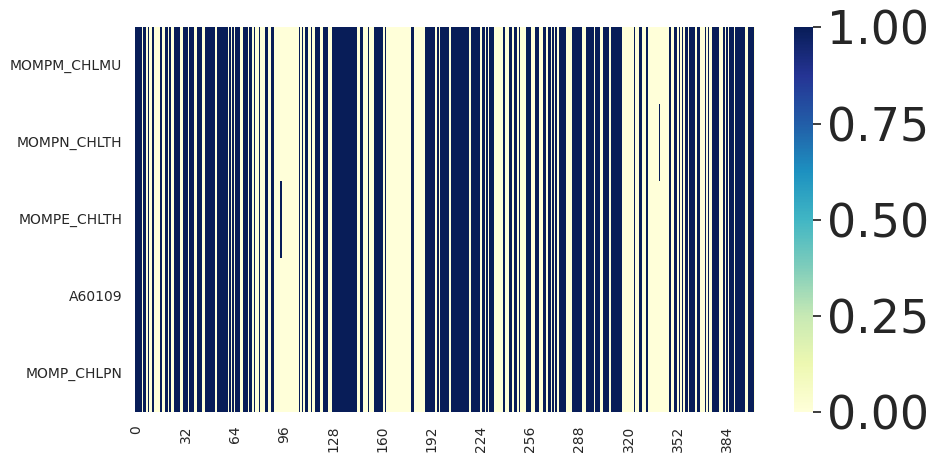

In [ ]:
# create df with mutated residues
d = df.loc[:,~(df == df.iloc[0]).all()] #remove conserved residues from sequence
#save only mutated residues to csv file
d.to_csv('xticksmutations.csv')

#Looks for matching aminoacids, using reverse find function. True = Conserved False = Substituted

#Look for conservation across all rows and columns
ft = df.eq(d.iloc[:, :], axis=1) #i.e. searcdhing for mutation/differences in sequence between origional df and mutated df
#ff.replace({False: 0, True: 1}, inplace=True) ## !!! not sure about this line? !!!!
ft.replace({False: 0, True: 1}, inplace=True)
tt = ft.eq(ff.iloc[:, :], axis=1)
#Turn boolean values into numeric values by multiplying by 1
ff = df.isin(vals)
#Use new data frame of 1 and 0 to populate heat map (seaborn)
pp.figure(figsize=(10,5))
y_axis_labels = ids # manual input for labels for y-axis

g = sns.heatmap(tt, yticklabels=y_axis_labels,cmap='YlGnBu')
sns.set(font_scale=3)
g.tick_params(labelsize=10)
#pp.savefig('Spike_heatmap_conserved.pdf',bbox_inches='tight')

##Parallel Heatmap

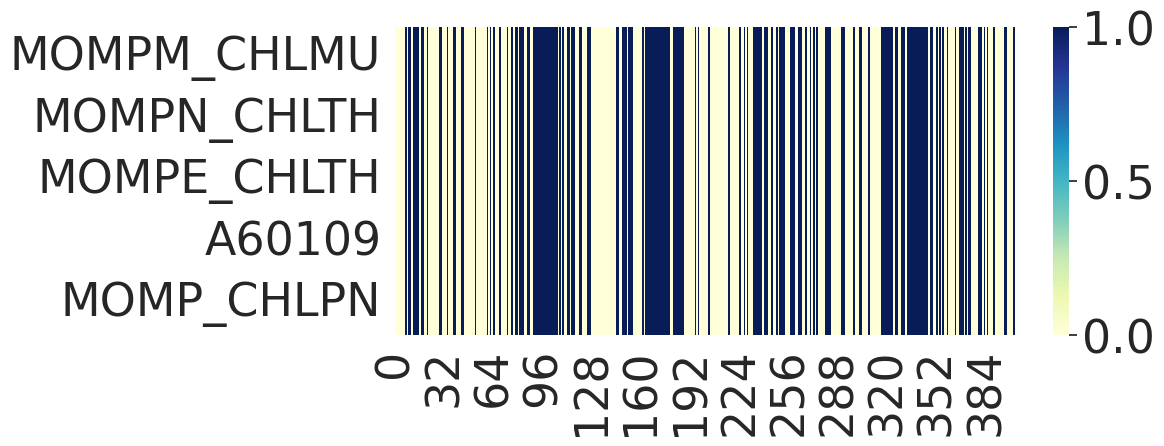

In [ ]:
#Looks for matching aminoacids, using reverse find function. True = substituted False = Same
#i.e. searcdhing for mutation/differences in the collagen
#Look for conservation across all rows and columns
ft = df.eq(d.iloc[:, :], axis=1)

#Turn boolean values into numeric values by multiplying by 1
#Use new data frame of 1 and 0 to populate heat map (seaborn)
pp.figure(figsize=(10,4))
#x_axis_labels = [] # labels for x-axis
#y_axis_labels = [] # manual input for labels for y-axis
#sns.set(font_scale=8)
g = sns.heatmap(ft, yticklabels=y_axis_labels,cmap='YlGnBu')
#g.tick_params(labelsize=10)
#pp.savefig('Spike_heatmap_conserved.pdf',bbox_inches='tight')

In [ ]:
df1.describe().to_csv('spikedescibe.csv')

##2) Targeted (conserved) residues

<Axes: >

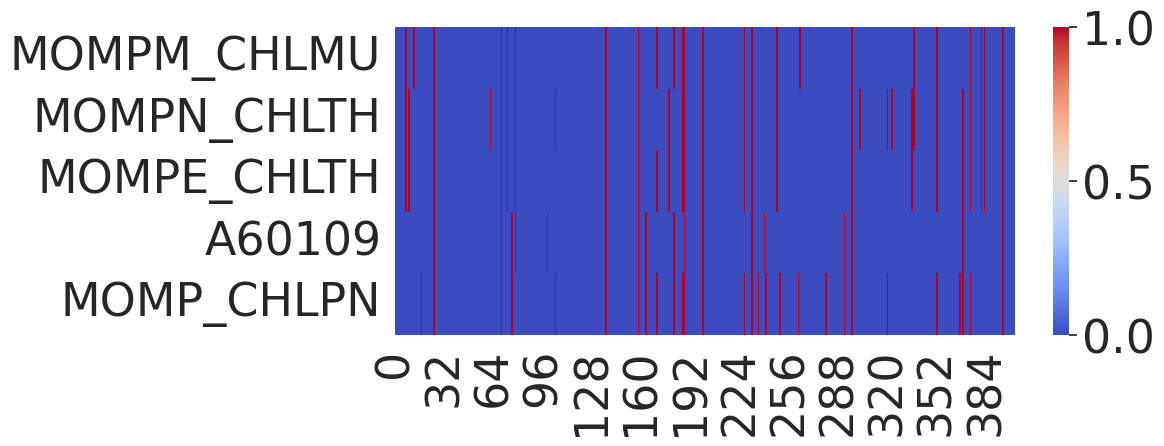

In [ ]:
#Looks for matching aminoacids, using reverse find function. True = substituted False = Same
#i.e. searcdhing for mutation/differences in the collagen
# uu = df.loc[0:].eq('G')
uu = df.iloc[:].eq('V')
#x_axis_labels =  # labels for x-axis
y_axis_labels = ids # manual input for labels for y-axis

pp.figure(figsize=(10,4))
sns.heatmap(uu, cmap="coolwarm", yticklabels=y_axis_labels)

##3) miniSCA

In [ ]:
#calculate statistics of amino acids in each position
stat1 = []
stat2 = []

# Iterate through each position (amino acid) in the protein (n positions)
for i in range(401): # THIS NEED TO MATCH THE NUMEBR OF AMINO ACIDS IN PROTEIN

   #ss = df[i].value_counts()
   #ss = df[i].value_counts(normalize=True) # prints list of amino acid frequencies

    ss = df[i].value_counts(normalize=True).tolist() # as the line above but transposed values
    if i not in ss:
    #stat1.append(ss)
      stat2.append(ss)

#pdstat1 = pd.DataFrame(stat1)
pdstat2 = pd.DataFrame(stat2)
# pdstat1.to_csv('PRO_aminoacidSTAT.csv')
# pdstat2.to_csv('PRO_aminoacidSTAT_norm.csv')

,0,1,2,3,4
count,400.000000,181.000000,7.700000e+01,25.0,3.000000e+00
mean,0.824000,0.272928,2.000000e-01,0.2,2.000000e-01
std,0.222594,0.096533,2.793758e-17,0.0,3.399350e-17
min,0.200000,0.200000,2.000000e-01,0.2,2.000000e-01
25%,0.600000,0.200000,2.000000e-01,0.2,2.000000e-01
50%,1.000000,0.200000,2.000000e-01,0.2,2.000000e-01
75%,1.000000,0.400000,2.000000e-01,0.2,2.000000e-01
max,1.000000,0.400000,2.000000e-01,0.2,2.000000e-01


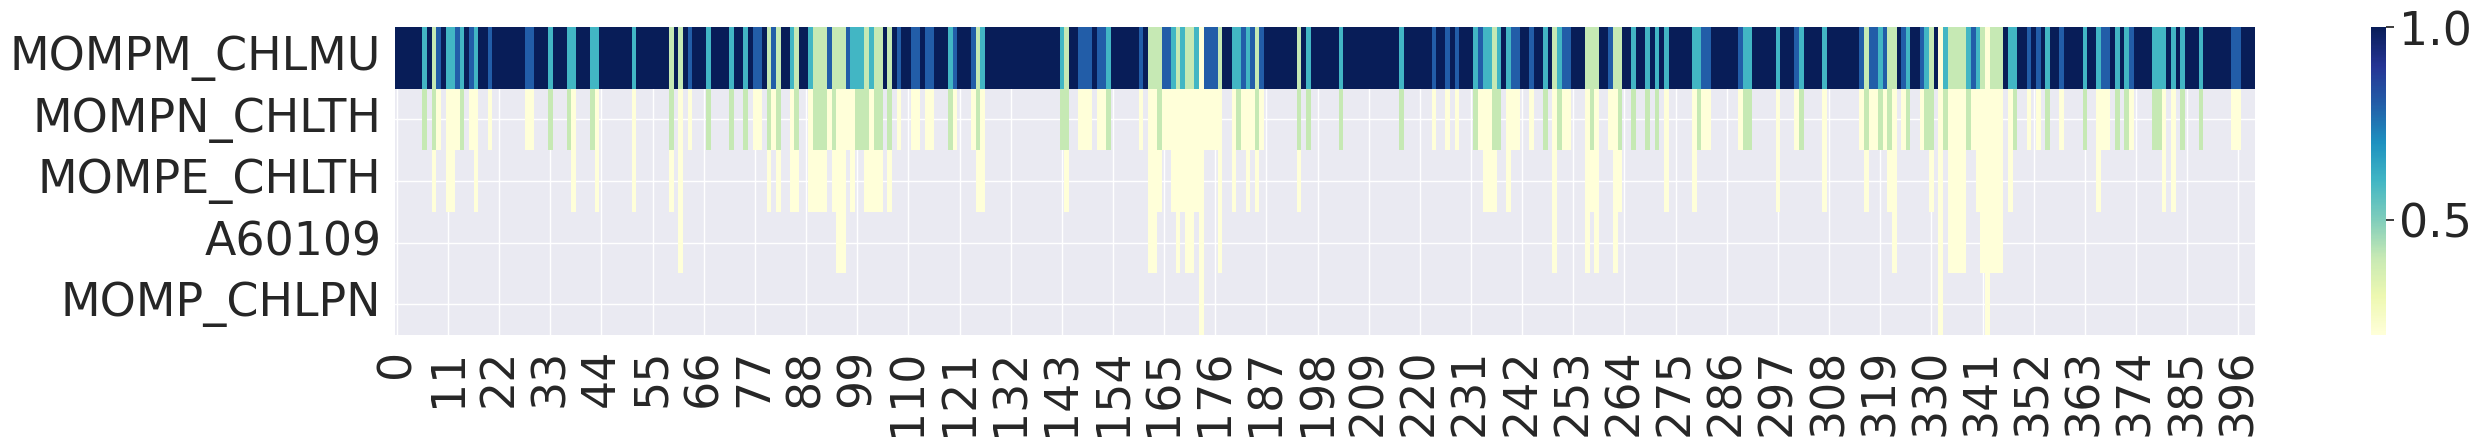

In [ ]:
ar2 = pdstat2.transpose()
#ar2 = pdstat1.transpose()
pp.figure(figsize=(30,4))
#sns.heatmap(ft, cmap='YlGnBu')
g = sns.heatmap(ar2, yticklabels=y_axis_labels, cmap='YlGnBu')
#pp.savefig('MOMP_conserved.pdf',bbox_inches='tight')

# Biophysical properties

## After loading in packages, create aminop acid libraries in the order stated below
##Library 1 - Inhouse wild card values [Jj,Oo,Xx,Uu] Note B and Z can be used but for now (ver 1.2) only
##4 out of 6 wilde card are chooses. Please see document (Inhouse_wildcard_basic.txt for explination of library


AcidSma = 'D', 'S'

AcidLarge = 'E'


BasicSma = 'H'

BasicLarge = 'R','K'


HPolSma = 'T'

HPolLarge = 'N', 'Q'


HnonSma = 'G', 'P', 'A', 'V'

HnonLarge = 'C', 'I', 'L', 'M', 'F', 'Y', 'W'


  AcidicSma = 'j'

  AcidicLarge = 'J'

  BasicSma = 'o'

  BasicLarge = 'O'

  HPolSma = 'x'

  HPolLarge = 'X'

  HnonSma = 'u'

  HnonLarge = 'U'

In [ ]:
## Amino acids are classified into groups on physical bulkiness

AcidSma = 'D', 'S'
AcidLarge = 'E'

BasicSma = 'H'
BasicLarge = 'R','K'

HPolSma = 'T'
HPolLarge = 'N', 'Q'

HnonSma = 'G', 'P', 'A', 'V'
HnonLarge = 'C', 'I', 'L', 'M', 'F', 'Y', 'W'

In [ ]:
##amino acid groups are assigned uniq identifier
AcidSma = 'j'
AcidLarge = 'J'
BasicSma = 'o'
BasicLarge = 'O'
HPolSma = 'x'
HPolLarge = 'X'
HnonSma = 'u'
HnonLarge = 'U'

In [ ]:
# creation of correlation matrix
#http://what-when-how.com/molecular-biology/van-der-waals-surface-volume-molecular-biology/

#Van der Waals surface

data = {'A':  [67],
'R':  [148],
'N':  [96],
'D':  [91],
'C':  [86],
'E':  [114],
'Q':  [109],
'G':  [48],
'H':  [118],
'I':  [124],
'L':  [124],
'K':  [135],
'M':  [124],
'F':  [135],
'P':  [90],
'S':  [90],
'T':  [93],
'W':  [163],
'Y':  [141],
'V':  [105],
        }

data
# creation of DataFrame
df = pd.DataFrame(data)
#matrix = read_csv('VdWRadiusMatrix.csv')
corrM = df.corr()

corrM

,A,R,N,D,C,E,Q,G,H,I,L,K,M,F,P,S,T,W,Y,V
0,67,148,96,91,86,114,109,48,118,124,124,135,124,135,90,90,93,163,141,105


In [ ]:
# scoring function of biophysical attributes
AcidicSma = -2
AcidicLarge = -2
BasicSma = 2
BasicLarge = 2
HPolSma = 0.5
HPolLarge = 0.5
HnonSma = -0.5
HnonLarge = -0.5
Nan = 0

### Store important residue positions and associated Id

In [ ]:
#Save conserved amino acids
xfx = df[ft.loc[:,] == 0] # saves mutated residues with as as is and residue location
conRes = xfx.dropna(axis=1, how='all')
conRes['Ids'] = ids
#Note, to get conserved sequence, use df.describe() on origional data frame

#save targetd group from Heat map 2
#xff = uu[uu.loc[:,] == 1]
#targetRes = xff.dropna(axis=1, how='all')
#targetRes['Ids'] = ids

#save mutated residues
xfx = ft[ft.loc[:,] == 1] # saves mutated residues with as 1's and residue location
xfx = df[ft.loc[:,] == 1] # saves mutated residues with as as is and residue location
muRes = xfx.dropna(axis=1, how='all')
muRes['Ids'] = ids


<ipython-input-187-8a2b9112bc27>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  conRes['Ids'] = ids
<ipython-input-187-8a2b9112bc27>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  muRes['Ids'] = ids


,0,1,2,3,4,5,6,7,8,9,...,393,394,395,396,397,398,399,400,401,Ids
count,5,5,5,5,5,5,5,5,5,5,...,5,5,5,5,5,5,5,5,5,5
unique,1,1,1,1,1,1,1,2,1,3,...,1,1,1,2,2,1,1,1,1,5
top,M,K,K,L,L,K,S,V,L,V,...,A,H,V,N,A,Q,F,R,F,MOMPM_CHLMU
freq,5,5,5,5,5,5,5,3,5,2,...,5,5,5,4,4,5,5,5,5,1


In [ ]:
# convert amino acids into pysiochemical properties
#Conserved residues only
cc = conRes.replace(['R', 'K'], BasicLarge).replace(['C', 'I', 'L', 'M', 'F', 'Y', 'W'], HnonLarge).replace(['G', 'P', 'A', 'V'],HnonSma).replace(['D', 'S'], AcidSma).replace(['E'], AcidLarge).replace(['T'], HPolSma).replace(['H'], BasicSma).replace(['N', 'Q'], HPolLarge)
# whole dataframe
cc2 = df.replace(['R', 'K'], BasicLarge).replace(['C', 'I', 'L', 'M', 'F', 'Y', 'W'], HnonLarge).replace(['G', 'P', 'A', 'V'],HnonSma).replace(['D', 'S'], AcidSma).replace(['E'], AcidLarge).replace(['T'], HPolSma).replace(['H'], BasicSma).replace(['N', 'Q'], HPolLarge)
df1 = pd.DataFrame(cc2)
df1['Ids'] = ids
print(df1)
#df.to_csv('BulkySpike.csv')


   0    1    2    3    4    5    6    7    8    9    ...  392  393  394  395  \
0 -0.5    2    2  1.0 -0.5    2   -2 -0.5 -0.5 -0.5  ... -0.5 -0.5    2 -0.5   
1 -0.5    2    2  1.0 -0.5    2   -2 -0.5 -0.5 -0.5  ... -0.5 -0.5    2 -0.5   
2 -0.5    2    2  1.0 -0.5    2   -2 -0.5 -0.5 -0.5  ... -0.5 -0.5    2 -0.5   
3 -0.5    2    2  1.0 -0.5    2   -2 -0.5 -0.5 -0.5  ... -0.5 -0.5    2 -0.5   
4 -0.5    2    2  1.0 -0.5    2   -2 -0.5 -0.5 -0.5  ... -0.5 -0.5    2 -0.5   

   396  397  398  399  400  401  
0  0.5 -0.5  0.5 -0.5    2 -0.5  
1  0.5 -0.5  0.5 -0.5    2 -0.5  
2  0.5 -0.5  0.5 -0.5    2 -0.5  
3  0.5 -0.5  0.5 -0.5    2 -0.5  
4 -2.0 -0.5  0.5 -0.5    2 -0.5  

[5 rows x 402 columns]


<Axes: >

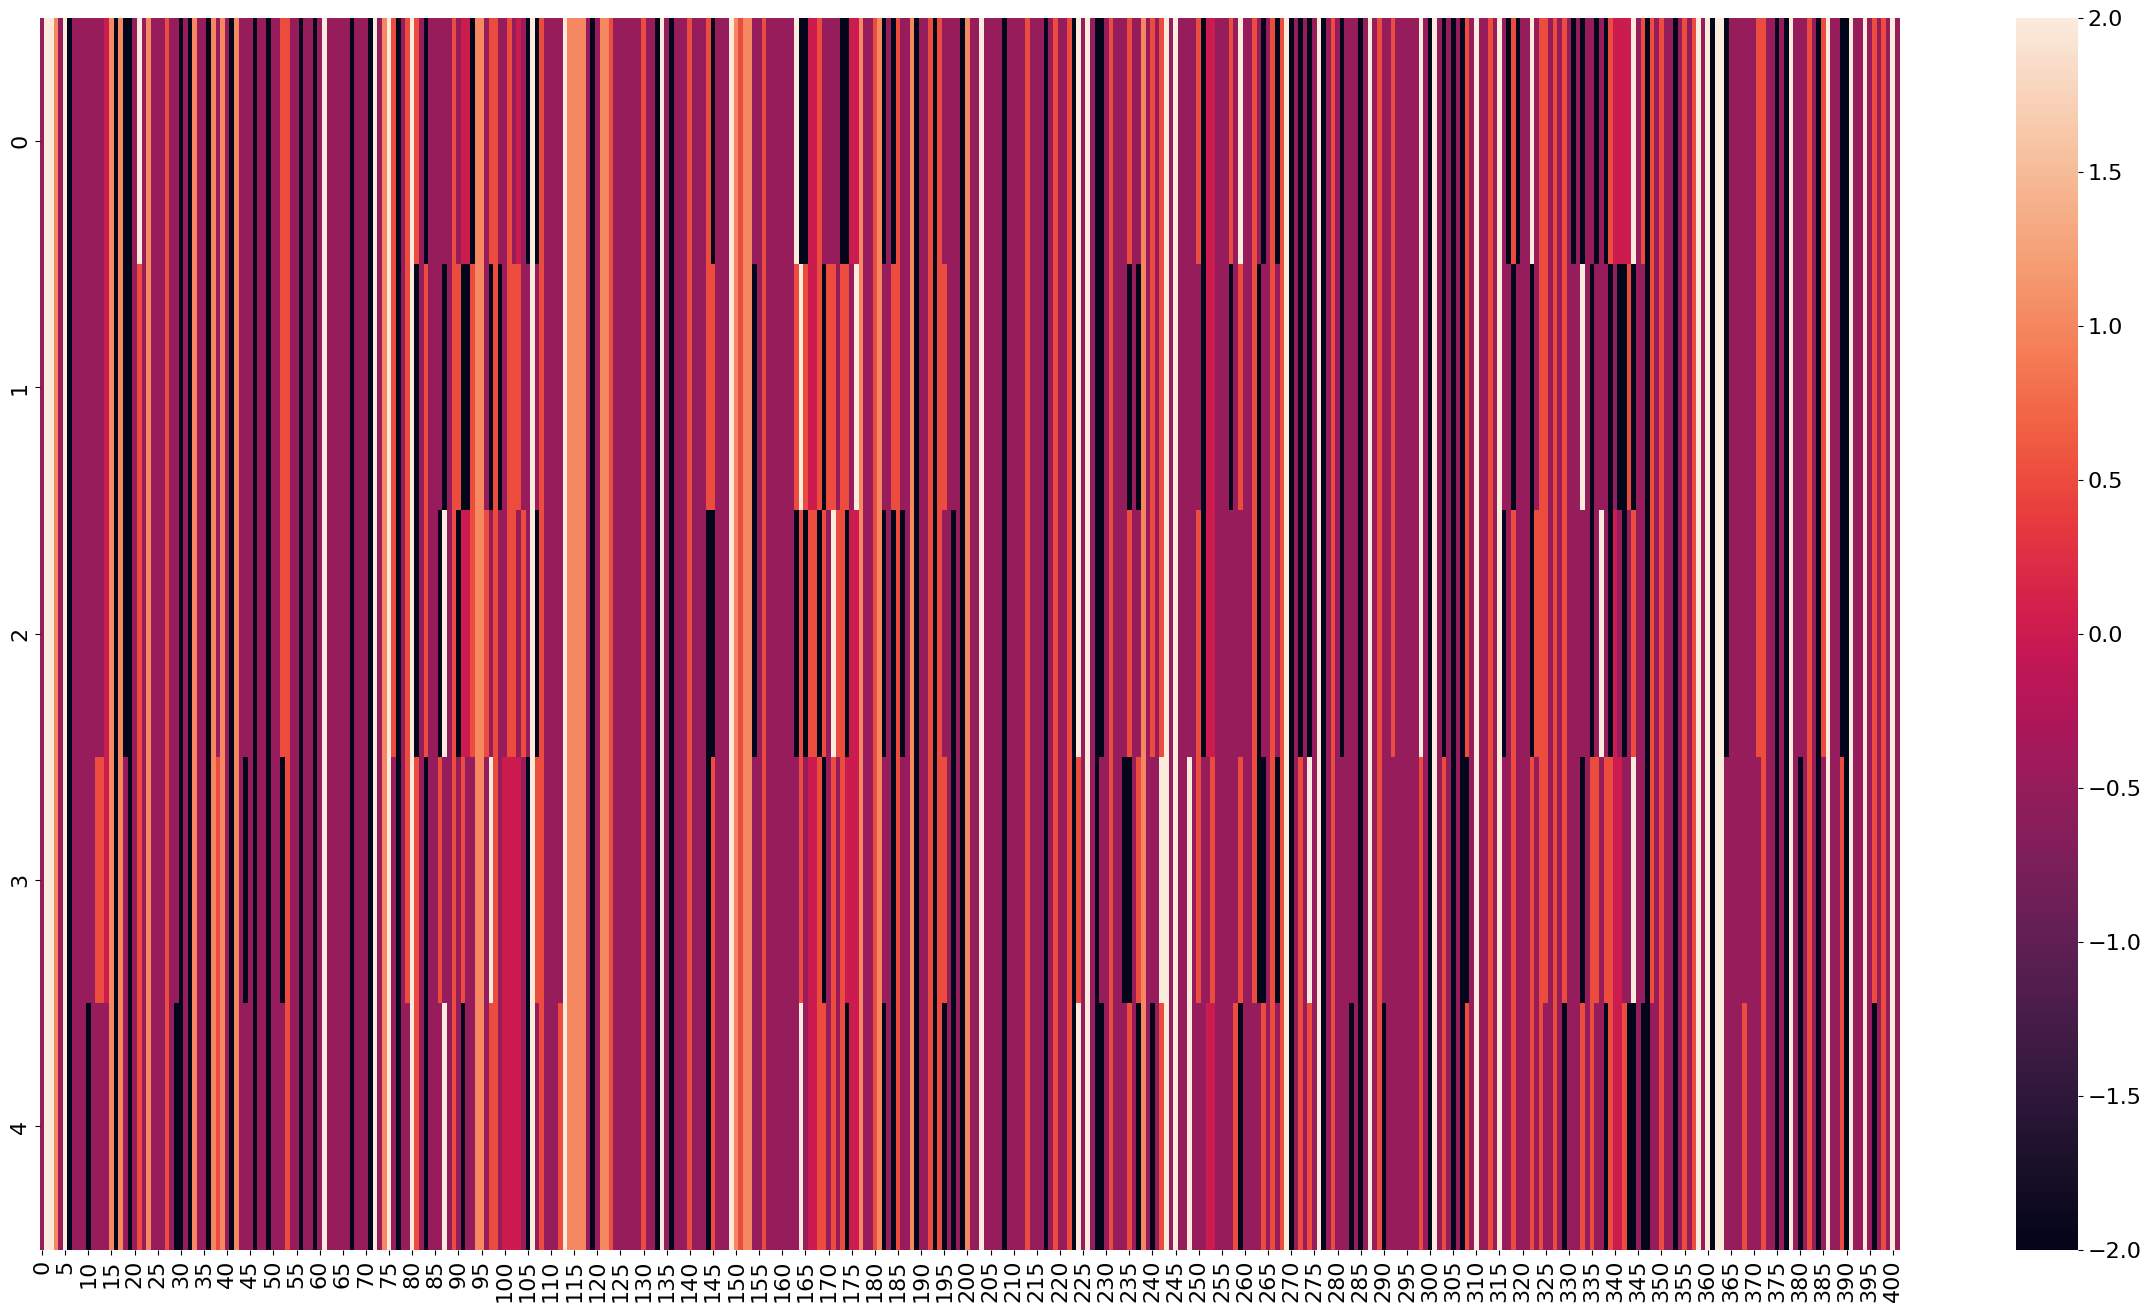

In [ ]:
cc = conservedRange2.replace(['R', 'K'], BasicLarge).replace(['C', 'I', 'L', 'M', 'F', 'Y', 'W'], HnonLarge).replace(['G', 'P', 'A', 'V'],HnonSma).replace(['D', 'S'], AcidicSma).replace(['E'], AcidicLarge).replace(['T'], HPolSma).replace(['H'], BasicSma).replace(['N', 'Q'], HPolLarge).replace(['N', 'Q'], HPolLarge).replace(['-'], Nan)
#print(cc)
df = pd.DataFrame(cc)
#df['Ids'] = RTids
print(df)
pp.figure(figsize=(30,16))
sns.heatmap(df)
#df.to_csv('RT_BigCON_sizes.csv')

# SeqLogo

https://www.tije.co/post/seqlogo_from_multiple_sequence_alignment/

In [ ]:
import seqlogo
# Load in MUSCLE alignment data or use existing data frame
#align = AlignIO.read("muscle-I20240202-023137-0249-37608114-p1m-aln-clustalw.txt", "clustal")
align = align

In [ ]:
# define seqlogo function
def alnSiteCompositionDF(aln, characters="ACDEFGHIKLMNPQRSTVWY"):
  alnRows = aln.get_alignment_length()
  compDict = {char:[0]*alnRows for char in characters}
  for record in aln:
    header = record.id
    seq = record.seq
    for aaPos in range(len(seq)):
      aa = seq[aaPos]
      if aa in characters:
        compDict[aa][aaPos] += 1
  return pd.DataFrame.from_dict(compDict)

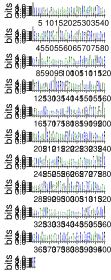

In [ ]:
# create seqlogo
momp = alnSiteCompositionDF(align) # apply above function to df
momp_alignmentSiteFreqDF = momp.div(momp.sum(axis=1), axis=0) # add normalise statistic values to df from seqlogo function
#create seqlogo
momp_alignmentSiteFreqSeqLogo = seqlogo.Ppm(momp_alignmentSiteFreqDF,alphabet_type="AA")
seqlogo.seqlogo(momp_alignmentSiteFreqSeqLogo, ic_scale = True, format = 'svg', size = 'xlarge',filename = './MompSeqlogo.svg')

Here, a Model describes exactly one 3D conformation (see web https://www.tutorialspoint.com/biopython/biopython_pdb_module.htm site for source material) It contains one or more chains.

# Large sequnce file creation.


In [ ]:
#import our three important packages
from Bio import SeqIO
from Bio import AlignIO
from Bio import Phylo

In [ ]:
# import sequence sand specify format
p1 = SeqIO.read("seq1.fasta", "fasta")
p2 = SeqIO.read("seq2.fasta", "fasta")
p3 = SeqIO.read("seq3.fasta", "fasta")
p4 = SeqIO.read("seq4.fasta", "fasta")
...
p12 = SeqIO.read("seq12.fasta", "fasta")

In [ ]:
# assidn easy to read id for phylotree
p1.id = 'Animal_1'
p2.id = 'Animal_2'
p3.id = 'Animal_3'
p4.id = 'Animal_4'
...
p12.id = 'Animal_12'

In [ ]:
# create combined sequence file
combined_sequence = SeqIO.write([p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12], "combined_sequence.fasta", "fasta")

# Misc code

In [ ]:
#statistis of amino acids in positions
df1.describe().to_csv('RT_stat.csv')
df2.describe().to_csv('INT_stat.csv')
df3.describe().to_csv('PRO_stat.csv')

#remove insertions from the seuence (-)
dd3 = df3.loc[:,~(df3 == df3.iloc[0]).all()]
# dd3.head()
dd1 = df1.loc[:,~(df1 == df1.iloc[0]).all()]
dd2 = df2.loc[:,~(df2 == df2.iloc[0]).all()]

In [ ]:
#calculate statistics of amino acids in each position
stat1 = []
stat2 = []
for i in range(101): # THIS NEED TO MATCH THE NUMEBR OF AMINO ACIDS IN PROTEIN

  # ss = df3[i].value_counts()
  # ss = df3[i].value_counts(normalize=True) # prints list of amino acid frequencies

  # Calculate the frequency of each amino acid at the current position (normalized)
  ss = df[i].value_counts(normalize=True).tolist() # as the line above but transposed values
  if i not in ss:
    # Append the frequencies to the stat2 list
    # stat1.append(ss)
    stat2.append(ss)

# print(stat1)

# pdstat1 = pd.DataFrame(stat1)
pdstat2 = pd.DataFrame(stat2)
# pdstat1.to_csv('PRO_aminoacidSTAT.csv')
# pdstat2.to_csv('PRO_aminoacidSTAT_norm.csv')
pdstat2

,0,1,2,3
0,1.0,NaN,NaN,NaN
1,1.0,NaN,NaN,NaN
2,1.0,NaN,NaN,NaN
3,1.0,NaN,NaN,NaN
4,1.0,NaN,NaN,NaN
...,...,...,...,...
95,0.4,0.2,0.2,0.2
96,0.4,0.2,0.2,0.2
97,0.8,0.2,NaN,NaN
98,0.6,0.2,0.2,NaN


ChatGPT generated tidy code

Explanation of changes and additions:

Added an import statement for the pandas library, assuming you're using it.
Removed the unnecessary stat1 list since it's not being used.
Added comments explaining the purpose of each part of the code.
Improved the variable name amino_acid_frequencies for clarity.
Removed the commented-out code for saving CSV files to keep the example concise.
Please note that you need to ensure df3 is properly defined and contains the protein data in the format you expect. Also, make sure the iteration range (range(101)) accurately reflects the number of amino acid positions in your protein data.

In [ ]:
import pandas as pd

# Assuming df3 is your DataFrame containing protein data

# Initialize lists to store statistics for each position
stat2 = []

# Iterate through each position (amino acid) in the protein (101 positions)
for i in range(99):  # Make sure this matches the actual number of amino acids in the protein
    # Calculate the frequency of each amino acid at the current position (normalized)
    amino_acid_frequencies = df1[i].value_counts(normalize=True).tolist()

    # Append the frequencies to the stat2 list
    stat2.append(amino_acid_frequencies)

# Convert the stat2 list of lists into a DataFrame
pdstat2 = pd.DataFrame(stat2)

# Optionally, you can save the DataFrame to CSV files if needed
# pdstat2.to_csv('PRO_aminoacidSTAT_norm.csv')


In [ ]:
#Searching for values equal to 1, i.e, conserved amino acids in all 7 families
tt = pdstat2[pdstat2.eq(1.0000).any(axis=1)] #seaches based on the frequency list

#Looks for matching aminoacids, using reverse find function. True = substituted False = Same
#i.e. searcdhing for mutation/differences in the collagen
#Look for conservation across all rows and columns
ft = df1.eq(dd1.iloc[:, :], axis=1)
ft.replace({False: 1, True: 0}, inplace=True)
ff = ft.T[ft.T.eq(1.0000).any(axis=1)]
new = ff.replace([0], 1.0000)
new.index # gets index of conserved amino acids
# arr2

Int64Index([  0,   1,   2,   3,   4,   5,   6,   8,  11,  16,
            ...
            390, 391, 392, 393, 394, 395, 398, 399, 400, 401],
           dtype='int64', length=221)

In [ ]:
# df1.T.iloc[0, 0:1] = [0.142857] # changes values in transposed data, df1.T.iloc[row to change, colstart:colend] = [value to change]
#df1.T.loc[df1.index[7], :] # should show values for entire row and specific

#chqnges values of amino acids in the conserved indexes
indices = [3,  15,  17,  23,  33,  37,  39,  42,  74,  94,  95, 114, 115,
            116, 117, 121, 122, 150, 152, 153, 177, 181, 188, 200, 238]
dff1 = df1
dff1.T.loc[indices, 0: 7] = 1.0000

print(dff1.head(16))

  0   1   2    3   4   5   6   7   8   9    ... 392 393 394 395 396 397 398  \
0   M   K   K  1.0   L   K   S   V   L   A  ...   A   A   H   V   N   A   Q   
1   M   K   K  1.0   L   K   S   V   L   V  ...   A   A   H   V   N   A   Q   
2   M   K   K  1.0   L   K   S   V   L   V  ...   A   A   H   V   N   A   Q   
3   M   K   K  1.0   L   K   S   A   L   L  ...   A   A   H   V   N   A   Q   
4   M   K   K  1.0   L   K   S   A   L   L  ...   A   A   H   V   S   G   Q   

  399 400 401  
0   F   R   F  
1   F   R   F  
2   F   R   F  
3   F   R   F  
4   F   R   F  

[5 rows x 402 columns]


In [ ]:
#Searching for values equal to 1, i.e, conserved amino acids in all 7 families
tt  = pdstat2[pdstat2[0:] < 0.285714] #seaches based on the frequency list
tt

#Looks for matching aminoacids, using reverse find function. True = substituted False = Same
#i.e. searcdhing for mutation/differences in the collagen
#Look for conservation across all rows and columns
ft = df1.eq(dd1.iloc[:, :], axis=1)
ft.replace({False: 1, True: 0}, inplace=True)
ff = ft.T[ft.T.eq(1.0000).any(axis=1)]
new = ff.replace([0], 1.0000)
new.index # gets index of conserved amino acids


Int64Index([  0,   1,   2,   3,   4,   5,   6,   8,  11,  15,
            ...
            390, 391, 392, 393, 394, 395, 398, 399, 400, 401],
           dtype='int64', length=235)

In [ ]:
ddf = df1.iloc[0:7, 10:15]
ddf

ddf2 = df1.iloc[0:7, 16:25]
ddf2
# ddf3 = df1.iloc[0:7, 10:15] + df1.iloc[0:7, 16:25]
ddf3 = pd.concat([ddf, ddf2], axis=1)
ddf3
# arr2.loc[df1.index[6], :]

,10,11,12,13,14,16,17,18,19,20,21,22,23,24
0,P,E,N,P,Y,T,P,V,F,A,I,K,K,K
1,Y,D,G,P,G,N,P,V,F,P,V,K,K,P
2,S,L,S,Q,W,S,P,V,F,V,I,R,K,K
3,S,N,S,P,W,T,P,V,F,V,I,K,K,K
4,Q,N,S,P,M,T,P,V,Y,P,V,P,K,P
5,C,Q,S,P,W,T,P,L,L,P,V,K,K,P
6,T,S,S,P,C,T,P,I,L,P,V,L,K,K
